# Insurance Upselling Machine Learning Evaluation & Supervised Learning - Data Wizard
* Dzulfikar Hanif Maulana (Ketua)
* Abdul Hardia Amin
* Haerunnisa
* Nisrina Widya Nur Farhani

# Load Dataset

In [ ]:
# Load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to a folder in Google Drive
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
# Load dataset from gdrive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_Insurance Upselling.csv') # Jngan diubah

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217,1
1,2.0,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183,0
2,3.0,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27,1
3,4.0,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203,0
4,5.0,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39,0


# DATA CLEANSING

## Handle Missing Values

In [ ]:
# Checking missing values each column
print(df.isnull().sum())

id                      3678
Gender                  3357
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured      1999
Vehicle_Age                0
Vehicle_Damage          1093
Annual_Premium             0
Policy_Sales_Channel     541
Vintage                    0
Response                   0
dtype: int64


In [ ]:
# Fill kolom 'id' dengan meneruskan row yang hilang
df.loc[df[df['id'].isna()].index, 'id'] = df[df['id'].isna()].index + 1

# Fill kolom 'Gender' dengan nilai mode
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)

# Drop nan values pada semua kolom
df = df.dropna()

print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


## Handle Duplicated Data

In [ ]:
# Checkig duplicate data
df.duplicated().any()

True

In [ ]:
# Checking duplicated data after cleaning
df = df.drop_duplicates()
df.duplicated().any()

False

## Change Data Types

In [ ]:
# Mengubah data type pada kolom yang ditentukan
df= df.astype({
    'id' : 'int',
    'Region_Code' : 'int',
    'Previously_Insured' : 'int',
    'Annual_Premium' : 'int',
    'Policy_Sales_Channel' : 'int',
})

In [ ]:
# Checking all over dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    378137 non-null  int64 
 1   Gender                378137 non-null  object
 2   Age                   378137 non-null  int64 
 3   Driving_License       378137 non-null  int64 
 4   Region_Code           378137 non-null  int64 
 5   Previously_Insured    378137 non-null  int64 
 6   Vehicle_Age           378137 non-null  object
 7   Vehicle_Damage        378137 non-null  object
 8   Annual_Premium        378137 non-null  int64 
 9   Policy_Sales_Channel  378137 non-null  int64 
 10  Vintage               378137 non-null  int64 
 11  Response              378137 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 37.5+ MB


## Feature Encoding

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Gender_Label'] = label_encoder.fit_transform(df['Gender'])
df['Vehicle_Damage_Label'] = label_encoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Vehicle_Age'], drop_first=False, dtype=int)
df_cleaned = df_encoded.copy()
df_cleaned.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378137 entries, 0 to 400130
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     378137 non-null  int64 
 1   Gender                 378137 non-null  object
 2   Age                    378137 non-null  int64 
 3   Driving_License        378137 non-null  int64 
 4   Region_Code            378137 non-null  int64 
 5   Previously_Insured     378137 non-null  int64 
 6   Vehicle_Damage         378137 non-null  object
 7   Annual_Premium         378137 non-null  int64 
 8   Policy_Sales_Channel   378137 non-null  int64 
 9   Vintage                378137 non-null  int64 
 10  Response               378137 non-null  int64 
 11  Gender_Label           378137 non-null  int64 
 12  Vehicle_Damage_Label   378137 non-null  int64 
 13  Vehicle_Age_1-2 Year   378137 non-null  int64 
 14  Vehicle_Age_< 1 Year   378137 non-null  int64 
 15  Vehic

## Handle Outliers

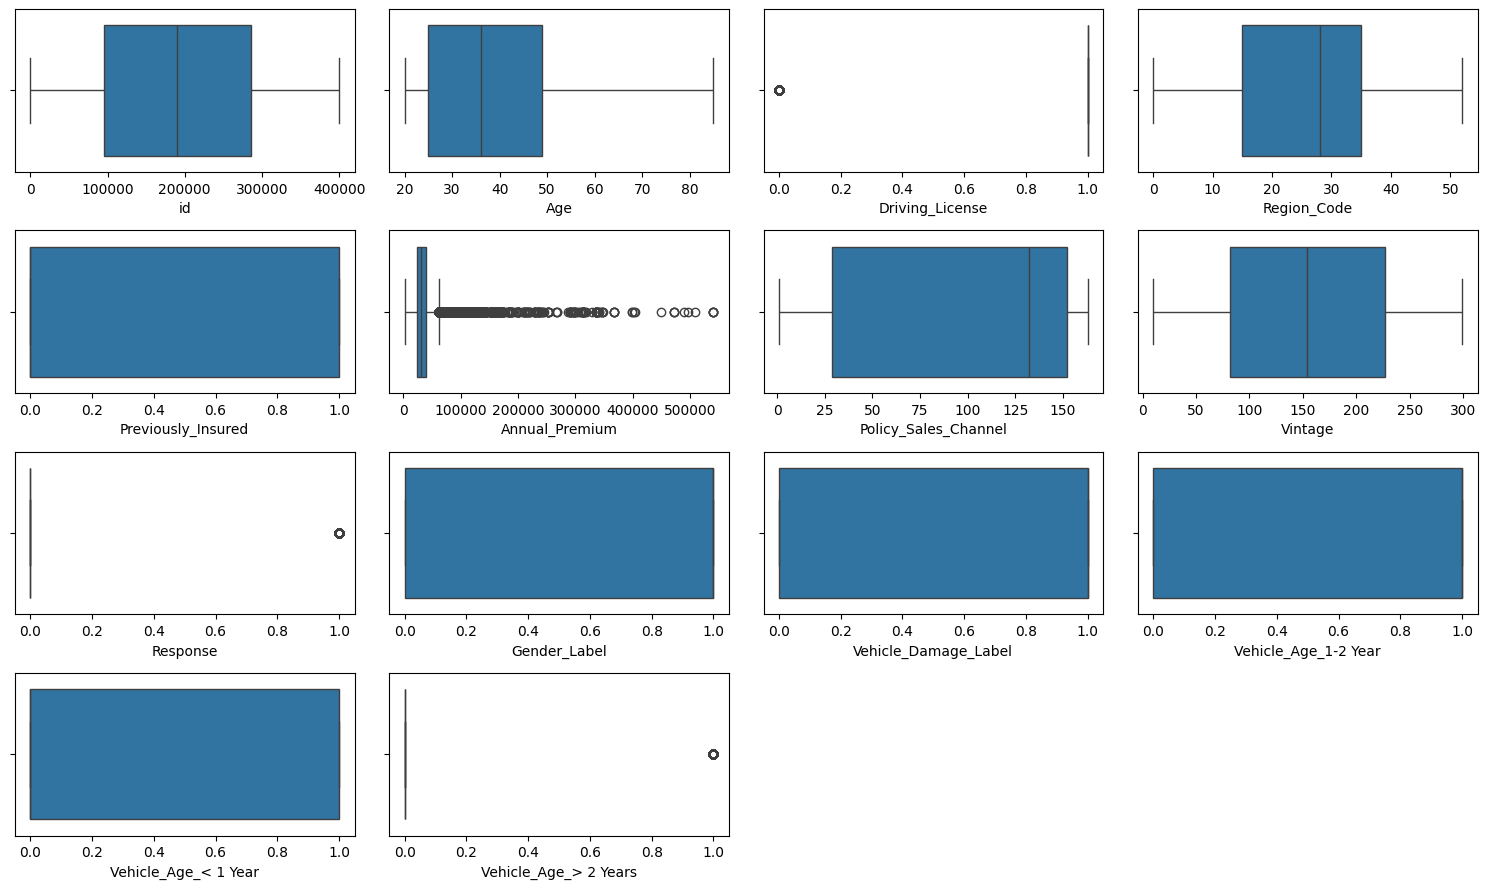

In [ ]:
# Check dengan boxplot
cols = 4
rows = 4
num_cols = df_cleaned.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot( rows, cols, i+1)

    sns.boxplot(x=df_cleaned[col], ax=ax)

fig.tight_layout()
plt.show()


In [ ]:
#check kolom annual premium
df_cleaned[['Annual_Premium']].describe()

,Annual_Premium
count,378137.000000
mean,30565.969865
std,17209.746438
min,2630.000000
25%,24408.000000
50%,31671.000000
75%,39400.000000
max,540165.000000


In [ ]:
Q1=df_cleaned[['Annual_Premium']].quantile(0.25)
Q3=df_cleaned[['Annual_Premium']].quantile(0.75)
IQR=Q3-Q1
IQR

Annual_Premium    14992.0
dtype: float64

In [ ]:
lower_lim= int(Q1 - 1.5 * IQR)
upper_lim= int(Q3 + 1.5 * IQR)

<ipython-input-17-982515da67c6>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lower_lim= int(Q1 - 1.5 * IQR)
<ipython-input-17-982515da67c6>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  upper_lim= int(Q3 + 1.5 * IQR)


In [ ]:
lower_lim

1920

In [ ]:
upper_lim

61888

In [ ]:
#Handle outlier di annual premium
out_low = (df_cleaned['Annual_Premium'] < lower_lim)
out_up = (df_cleaned['Annual_Premium'] > upper_lim)

In [ ]:
outliers=df_cleaned['Annual_Premium'][(out_low|out_up)]
outliers

25        61964
37        76251
67        66338
139       62164
149       76651
          ...  
388929    68915
389776    74121
391758    72053
392489    73012
399929    76737
Name: Annual_Premium, Length: 10236, dtype: int64

In [ ]:
# drop rows containing outliers
df_cleaned_2= df_cleaned.drop(outliers.index)

In [ ]:
df_cleaned_2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400031,356867,Female,66,1,28,1,No,40251,26,69,0,0,0,1,0,0
400066,400067,Male,45,1,8,0,Yes,2630,26,282,0,1,1,0,0,1
400077,133162,Male,73,1,8,0,Yes,37065,124,117,0,1,1,1,0,0
400102,254355,Male,26,1,50,1,No,34724,152,291,0,1,0,0,1,0


In [ ]:
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367901 entries, 0 to 400130
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     367901 non-null  int64 
 1   Gender                 367901 non-null  object
 2   Age                    367901 non-null  int64 
 3   Driving_License        367901 non-null  int64 
 4   Region_Code            367901 non-null  int64 
 5   Previously_Insured     367901 non-null  int64 
 6   Vehicle_Damage         367901 non-null  object
 7   Annual_Premium         367901 non-null  int64 
 8   Policy_Sales_Channel   367901 non-null  int64 
 9   Vintage                367901 non-null  int64 
 10  Response               367901 non-null  int64 
 11  Gender_Label           367901 non-null  int64 
 12  Vehicle_Damage_Label   367901 non-null  int64 
 13  Vehicle_Age_1-2 Year   367901 non-null  int64 
 14  Vehicle_Age_< 1 Year   367901 non-null  int64 
 15  Vehic

## Feature Transformation

In [ ]:
# Create a new column with log transformation values
df_cleaned_2['Annual_Premium_Log'] = np.log(df_cleaned_2['Annual_Premium'])


In [ ]:
df_cleaned_2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1,10.607921
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0,10.420375
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1,10.553049
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0,10.261826
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0,10.221796


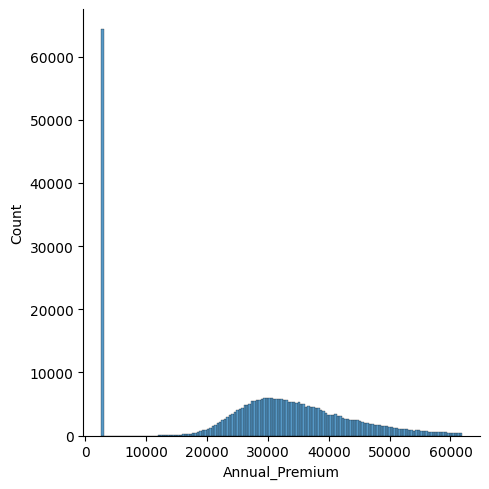

In [ ]:
sns.displot(df_cleaned_2, x="Annual_Premium")

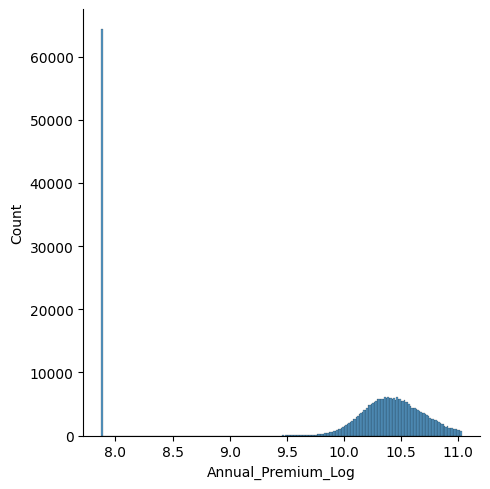

In [ ]:
sns.displot(df_cleaned_2, x="Annual_Premium_Log")

In [ ]:
df_cleaned_2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1,10.607921
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0,10.420375
2,3,Male,47,1,28,0,Yes,38294,26,27,1,1,1,0,0,1,10.553049
3,4,Male,21,1,11,1,No,28619,152,203,0,1,0,0,1,0,10.261826
4,5,Female,29,1,41,1,No,27496,152,39,0,0,0,0,1,0,10.221796


# Feature Engineering

## Feature Selection

In [ ]:
df_cleaned_2.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,1,Male,44,1,28,0,Yes,40454,26,217,1,1,1,0,0,1,10.607921
1,2,Male,76,1,3,0,No,33536,26,183,0,1,0,1,0,0,10.420375


In [ ]:
df_cleaned_2.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Label',
       'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Annual_Premium_Log'],
      dtype='object')

In [ ]:
#feature selection
features_to_use = ['Age', 'Region_Code','Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Label',
       'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years', 'Annual_Premium_Log']

df_selected = df_cleaned_2[features_to_use]

df_selected.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log
0,44,28,0,40454,26,217,1,1,1,0,0,1,10.607921
1,76,3,0,33536,26,183,0,1,0,1,0,0,10.420375


## Feature Extraction

In [ ]:
# Jumlah Klaim Sebelumnya
df_selected['Previous_Claims_Count'] = df_selected['Previously_Insured'] * df_selected['Vehicle_Damage_Label']

# Durasi Kepemilikan Kendaraan
df_selected['Ownership_Duration'] = df_selected['Vintage'] * (df_selected['Vehicle_Age_1-2 Year'] + 2 * df_selected['Vehicle_Age_< 1 Year'] + 3 * df_selected['Vehicle_Age_> 2 Years'])

# Frekuensi Penggunaan Policy Sales Channel
sales_channel_freq = df_selected.groupby('Policy_Sales_Channel').size().reset_index(name='Sales_Channel_Frequency')
df_selected = pd.merge(df_selected, sales_channel_freq, on='Policy_Sales_Channel', how='left')

# Indeks Keterlibatan Pelanggan
df_selected['Customer_Engagement_Index'] = (df_selected['Vintage'] * df_selected['Annual_Premium']) / (df_selected['Age'] + 1)

df_new = df_selected
df_new.sample(5)

<ipython-input-33-2d7fdd473719>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Previous_Claims_Count'] = df_selected['Previously_Insured'] * df_selected['Vehicle_Damage_Label']
<ipython-input-33-2d7fdd473719>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Ownership_Duration'] = df_selected['Vintage'] * (df_selected['Vehicle_Age_1-2 Year'] + 2 * df_selected['Vehicle_Age_< 1 Year'] + 3 * df_selected['Vehicle_Age_> 2 Years'])


,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Annual_Premium_Log,Previous_Claims_Count,Ownership_Duration,Sales_Channel_Frequency,Customer_Engagement_Index
288156,43,28,0,38559,26,104,0,0,1,1,0,0,10.559945,0,104,75800,91139.454545
209462,35,29,0,2630,156,81,0,1,1,1,0,0,7.874739,0,81,10505,5917.500000
52191,39,28,0,33206,60,87,1,1,1,1,0,0,10.410486,0,87,507,72223.050000
173290,78,26,0,41749,22,279,0,0,1,1,0,0,10.639431,0,279,326,147442.670886
179974,23,34,1,44457,152,198,0,0,0,0,1,0,10.702278,0,396,131120,366770.250000


In [ ]:
df = df_selected
df.columns

Index(['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Gender_Label',
       'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Annual_Premium_Log', 'Previous_Claims_Count',
       'Ownership_Duration', 'Sales_Channel_Frequency',
       'Customer_Engagement_Index'],
      dtype='object')

# Train Test Split

In [ ]:
X = df[['Age', 'Region_Code','Previously_Insured', 'Gender_Label', 'Vehicle_Damage_Label', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Previous_Claims_Count',
       'Ownership_Duration', ]]
y = df['Response']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X

,Age,Region_Code,Previously_Insured,Gender_Label,Vehicle_Damage_Label,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Previous_Claims_Count,Ownership_Duration
0,44,28,0,1,1,0,0,1,0,651
1,76,3,0,1,0,1,0,0,0,183
2,47,28,0,1,1,0,0,1,0,81
3,21,11,1,1,0,0,1,0,0,406
4,29,41,1,0,0,0,1,0,0,78
...,...,...,...,...,...,...,...,...,...,...
367896,66,28,1,0,0,1,0,0,0,69
367897,45,8,0,1,1,0,0,1,0,846
367898,73,8,0,1,1,1,0,0,0,117
367899,26,50,1,1,0,0,1,0,0,582


In [ ]:
y

0         1
1         0
2         1
3         0
4         0
         ..
367896    0
367897    0
367898    0
367899    0
367900    1
Name: Response, Length: 367901, dtype: int64

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Modelling

## Without SMOTE

In [ ]:
# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [ ]:
def evaluate_model(classifiers, X_train, y_train, X_test, y_test):
    results = []
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)

        # Evaluate on training data
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')

        # Evaluate on test data
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy,
            'Train Precision': train_precision, 'Test Precision': test_precision,
            'Train Recall': train_recall, 'Test Recall': test_recall,
            'Train F1-Score': train_f1, 'Test F1-Score': test_f1,
            'Confusion Matrix': conf_matrix
        })

    results_df = pd.DataFrame(results)

    # Print results
    for _, row in results_df.iterrows():
        print(f"Model: {row['Model']}")
        print(f"Train Accuracy: {row['Train Accuracy']:.4f}")
        print(f"Test Accuracy: {row['Test Accuracy']:.4f}")
        print(f"Train Precision: {row['Train Precision']:.4f}")
        print(f"Test Precision: {row['Test Precision']:.4f}")
        print(f"Train Recall: {row['Train Recall']:.4f}")
        print(f"Test Recall: {row['Test Recall']:.4f}")
        print(f"Train F1-Score: {row['Train F1-Score']:.4f}")
        print(f"Test F1-Score: {row['Test F1-Score']:.4f}")
        print("Confusion Matrix:")
        print(row['Confusion Matrix'])
        print()

    return results_df

In [ ]:
# Evaluate without SMOTE
results_without_smote = evaluate_model(classifiers, X_train_scaled, y_train, X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: KNN
Train Accuracy: 0.8972
Test Accuracy: 0.8563
Train Precision: 0.8816
Test Precision: 0.8221
Train Recall: 0.8972
Test Recall: 0.8563
Train F1-Score: 0.8824
Test F1-Score: 0.8347
Confusion Matrix:
[[61472  2996]
 [ 7574  1539]]

Model: Naive Bayes
Train Accuracy: 0.6962
Test Accuracy: 0.6995
Train Precision: 0.8964
Test Precision: 0.8951
Train Recall: 0.6962
Test Recall: 0.6995
Train F1-Score: 0.7489
Test F1-Score: 0.7506
Confusion Matrix:
[[43150 21318]
 [  793  8320]]

Model: Random Forest
Train Accuracy: 0.9688
Test Accuracy: 0.8461
Train Precision: 0.9681
Test Precision: 0.8211
Train Recall: 0.9688
Test Recall: 0.8461
Train F1-Score: 0.9680
Test F1-Score: 0.8317
Confusion Matrix:
[[60396  4072]
 [ 7251  1862]]

Model: Neural Network
Train Accuracy: 0.8788
Test Accuracy: 0.8762
Train Precision: 0.8447
Test Precision: 0.8529
Train Recall: 0.8788
Test Recall: 0.8762
Train F1-Score: 0.8224
Test F1-Score: 0.8186
Confusion Matrix:
[[64463     5]
 [ 9102    11]]

Model: XGBoost


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cross Validation

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_val_score

def evaluate_model_cv(model, X_train, y_train, X_test, y_test, cv=5):
    """
    Perform cross-validation and compute precision and recall scores.

    Parameters:
    - model: Classifier model object (must have fit and predict methods).
    - X_train, y_train: Training data.
    - X_test, y_test: Test data.
    - cv: Number of cross-validation folds.

    Returns:
    - mean_train_precision, mean_train_recall: Mean cross-validated precision and recall scores on training data.
    - mean_test_precision, mean_test_recall: Mean cross-validated precision and recall scores on test data.
    """
    # Define precision and recall scorers
    precision_scorer = make_scorer(precision_score, average='weighted')
    recall_scorer = make_scorer(recall_score, average='weighted')
    accuracy_scorer =make_scorer(accuracy_score)
    f1_scorer =make_scorer(f1_score, average='weighted')


    # Perform cross-validation on training data for precision and recall
    cv_precision_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=precision_scorer)
    mean_train_precision = cv_precision_train.mean()

    cv_recall_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=recall_scorer)
    mean_train_recall = cv_recall_train.mean()

    cv_accuracy_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=accuracy_scorer)
    mean_train_accuracy = cv_accuracy_train.mean()

    cv_f1_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_scorer)
    mean_train_f1 = cv_f1_train.mean()

    # Perform cross-validation on test data for precision and recall
    cv_precision_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=precision_scorer)
    mean_test_precision = cv_precision_test.mean()

    cv_recall_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=recall_scorer)
    mean_test_recall = cv_recall_test.mean()

    cv_accuracy_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=accuracy_scorer)
    mean_test_accuracy = cv_accuracy_test.mean()

    cv_f1_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=f1_scorer)
    mean_test_f1 = cv_f1_test.mean()

    # Print cross-validation results
    print(f"Cross-validated precision scores on training data: {cv_precision_train}")
    print(f"Mean precision on training data: {mean_train_precision:.4f}")
    print()
    print(f"Cross-validated recall scores on training data: {cv_recall_train}")
    print(f"Mean recall on training data: {mean_train_recall:.4f}")
    print()
    print(f"Cross-validated accuracy scores on training data: {cv_accuracy_train}")
    print(f"Mean accuracy on training data: {mean_train_accuracy:.4f}")
    print()
    print(f"Cross-validated f1 scores on training data: {cv_f1_train}")
    print(f"Mean f1 on training data: {mean_train_f1:.4f}")
    print()
    print(f"Cross-validated precision scores on test data: {cv_precision_test}")
    print(f"Mean precision on test data: {mean_test_precision:.4f}")
    print()
    print(f"Cross-validated recall scores on test data: {cv_recall_test}")
    print(f"Mean recall on test data: {mean_test_recall:.4f}")
    print()
    print(f"Cross-validated accuracy scores on test data: {cv_accuracy_test}")
    print(f"Mean accuracy on test data: {mean_test_accuracy:.4f}")
    print()
    print(f"Cross-validated f1 scores on test data: {cv_f1_test}")
    print(f"Mean f1 on test data: {mean_test_f1:.4f}")

    return mean_train_precision, mean_train_recall, mean_train_accuracy, mean_train_f1, mean_test_precision, mean_test_recall, mean_test_accuracy, mean_test_f1

In [ ]:
NB =GaussianNB()

evaluate_model_cv(NB, X_train_scaled, y_train, X_test_scaled, y_test, cv=5)

Cross-validated precision scores on training data: [0.89755716 0.89614788 0.89759464 0.89446508 0.89545989]
Mean precision on training data: 0.8962

Cross-validated recall scores on training data: [0.6921548  0.69687755 0.68758494 0.7033501  0.69954471]
Mean recall on training data: 0.6959

Cross-validated accuracy scores on training data: [0.6921548  0.69687755 0.68758494 0.7033501  0.69954471]
Mean accuracy on training data: 0.6959

Cross-validated f1 scores on training data: [0.74556918 0.74940683 0.74181949 0.75461825 0.75155575]
Mean f1 on training data: 0.7486

Cross-validated precision scores on test data: [0.90208744 0.90019575 0.90240618 0.90117227 0.90112872]
Mean precision on test data: 0.9014

Cross-validated recall scores on test data: [0.65380173 0.66662136 0.65296276 0.65418592 0.6463713 ]
Mean recall on test data: 0.6548

Cross-validated accuracy scores on test data: [0.65380173 0.66662136 0.65296276 0.65418592 0.6463713 ]
Mean accuracy on test data: 0.6548

Cross-valid

(0.8962449288778325,
 0.6959024191356347,
 0.6959024191356347,
 0.7485938970505901,
 0.9013980739789433,
 0.6547886137302813,
 0.6547886137302813,
 0.7131580579150194)

### Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score
import pandas as pd

def tune_parameters(model, params, X_train, y_train, cv=5):
    """
    Perform hyperparameter tuning using GridSearchCV and evaluate model performance.

    Parameters:
    - model: Classifier model object (e.g., RandomForestClassifier, SVC, etc.).
    - params: Dictionary of hyperparameters and their values to be tuned.
    - X_train, y_train: Training data.
    - cv: Number of cross-validation folds.

    Returns:
    - pd.DataFrame: DataFrame with hyperparameters and corresponding mean precision and recall scores.
    """
    # Define precision and recall scorers
    precision_scorer = make_scorer(precision_score,  average='weighted')
    recall_scorer = make_scorer(recall_score, average='weighted')

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, params, scoring={'precision': precision_scorer, 'recall': recall_scorer},
                               refit='precision', cv=cv, verbose=1, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    # Extract results
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract relevant columns
    cols = ['param_' + param for param in params.keys()]
    cols += ['mean_test_precision', 'std_test_precision', 'mean_test_recall', 'std_test_recall']
    results = results[cols]

    return results

In [ ]:
NB =GaussianNB()

params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}


tune_parameters(NB, params, X_train, y_train, cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,param_var_smoothing,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.0,0.896114,0.001195,0.696606,0.005399
1,0.0,0.894840,0.001243,0.701876,0.004554
2,0.0,0.886849,0.000883,0.718364,0.001575
3,0.000001,0.884283,0.000721,0.719672,0.000854
4,0.00001,0.844984,0.000628,0.795423,0.001370


## With SMOTE

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Evaluate with SMOTE
results_with_smote = evaluate_model(classifiers, X_train_smote, y_train_smote, X_test_scaled, y_test)

Model: KNN
Train Accuracy: 0.8931
Test Accuracy: 0.7569
Train Precision: 0.8982
Test Precision: 0.8523
Train Recall: 0.8931
Test Recall: 0.7569
Train F1-Score: 0.8927
Test F1-Score: 0.7909
Confusion Matrix:
[[50163 14305]
 [ 3581  5532]]

Model: Naive Bayes
Train Accuracy: 0.7840
Test Accuracy: 0.6416
Train Precision: 0.8332
Test Precision: 0.9032
Train Recall: 0.7840
Test Recall: 0.6416
Train F1-Score: 0.7757
Test F1-Score: 0.7017
Confusion Matrix:
[[38295 26173]
 [  196  8917]]

Model: Random Forest
Train Accuracy: 0.9813
Test Accuracy: 0.8207
Train Precision: 0.9813
Test Precision: 0.8295
Train Recall: 0.9813
Test Recall: 0.8207
Train F1-Score: 0.9813
Test F1-Score: 0.8249
Confusion Matrix:
[[57340  7128]
 [ 6064  3049]]

Model: Neural Network
Train Accuracy: 0.7964
Test Accuracy: 0.6927
Train Precision: 0.8212
Test Precision: 0.8983
Train Recall: 0.7964
Test Recall: 0.6927
Train F1-Score: 0.7924
Test F1-Score: 0.7451
Confusion Matrix:
[[42469 21999]
 [  610  8503]]

Model: XGBoost


### Cross Validation

In [ ]:
evaluate_model_cv(NB, X_train_smote, y_train_smote, X_test_scaled, y_test, cv=5)

Cross-validated precision scores on training data: [0.83330014 0.83333756 0.8326754  0.83331884 0.83352397]
Mean precision on training data: 0.8332

Cross-validated recall scores on training data: [0.78381565 0.78392198 0.78311005 0.78457717 0.78465449]
Mean recall on training data: 0.7840

Cross-validated accuracy scores on training data: [0.78381565 0.78392198 0.78311005 0.78457717 0.78465449]
Mean accuracy on training data: 0.7840

Cross-validated f1 scores on training data: [0.77548221 0.77560565 0.77471889 0.77640346 0.77646567]
Mean f1 on training data: 0.7757

Cross-validated precision scores on test data: [0.90208744 0.90019575 0.90240618 0.90117227 0.90112872]
Mean precision on test data: 0.9014

Cross-validated recall scores on test data: [0.65380173 0.66662136 0.65296276 0.65418592 0.6463713 ]
Mean recall on test data: 0.6548

Cross-validated accuracy scores on test data: [0.65380173 0.66662136 0.65296276 0.65418592 0.6463713 ]
Mean accuracy on test data: 0.6548

Cross-valid

(0.8332311841295923,
 0.7840158696894614,
 0.7840158696894614,
 0.7757351771831937,
 0.9013980739789433,
 0.6547886137302813,
 0.6547886137302813,
 0.7131580579150194)

### Tuning Hyperparameter

In [ ]:
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}


tune_parameters(NB, params, X_train_smote, y_train_smote, cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,param_var_smoothing,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.0,0.833231,0.000289,0.784016,0.000564
1,0.0,0.833231,0.000289,0.784016,0.000564
2,0.0,0.833231,0.000289,0.784016,0.000564
3,0.000001,0.833231,0.000289,0.784016,0.000564
4,0.00001,0.833231,0.000289,0.784016,0.000564


# Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

result = permutation_importance(gnb, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance = result.importances_mean
print(importance)

[ 0.03248121  0.00254006 -0.08070018  0.00249249 -0.06687596  0.03021568
  0.03248937  0.00227368 -0.00461668  0.0078947 ]


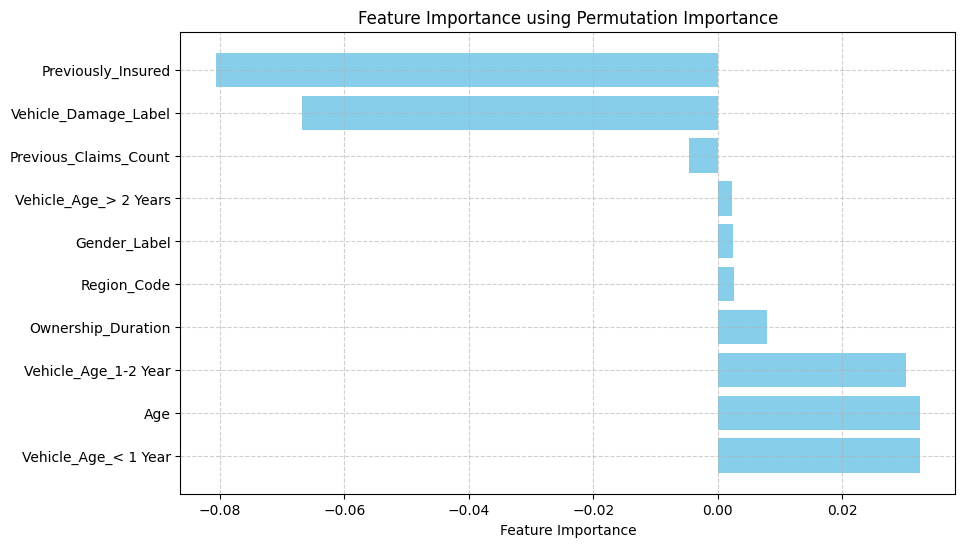

In [ ]:
features = np.array(X.columns)
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importance[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Permutation Importance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()